In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_table('wine.xls',sep=',',header=None)
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
d=d.rename({0:'Target',1:'Alcohol',2:'Malic acid',3:'Ash',4:'Alcalinity of ash',5:'Magnesium',6:'Total phenols',7:'Flavanoids',8:'Nonflavanoid phenols',9:'Proanthocyanins',10:'Color intensity',11:'Hue',12:'OD',13:'Proline'},axis=1)

In [4]:
d['Target'].value_counts()

2    71
1    59
3    48
Name: Target, dtype: int64

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# KMeans

In [6]:
x=d.drop(['Target'],axis=1)
df_scaled = x.apply(zscore)

In [7]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2314.000000
1,2,1658.758852
2,3,1277.928489
3,4,1175.378999
4,5,1112.209887
5,6,1053.242142
6,7,990.444936
7,8,932.538350
8,9,890.397272
9,10,871.506161


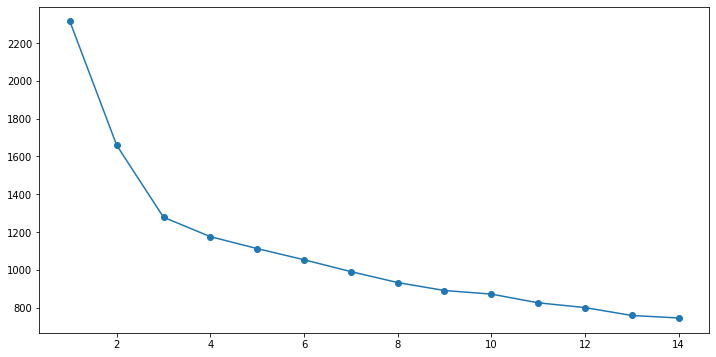

In [8]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [9]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [10]:
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [11]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels_k'] = df_labels['labels'].astype('category')

In [12]:
df_labeled_k = x.join(df_labels)

In [13]:
df_labeled_k['labels_k'].value_counts()

0    65
1    62
2    51
Name: labels_k, dtype: int64

In [14]:
df_analysis = (df_labeled_k.groupby(['labels_k'] , axis=0)).head(200)

In [15]:
kmeans2 = KMeans(n_clusters=3)
clusters_k = kmeans2.fit_predict(x)
df_k = x.copy(deep=True)
df_k['label_k'] = clusters_k

In [16]:
print('Original Data Classes:')
print(d.Target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label_k.value_counts())

Original Data Classes:
2    71
1    59
3    48
Name: Target, dtype: int64
------------------------------
Predicted Data Classes:
0    69
1    62
2    47
Name: label_k, dtype: int64


In [17]:
x= df_k.drop('label_k',axis=1)
y= df_k['label_k']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [20]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy',cv=3,n_jobs=-1)
gsearch.fit(x,y)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
#y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
#y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[48  0  0]
 [ 0 39  0]
 [ 0  0 37]]
Accuracy score of test:  1.0
Confusion Matrix of test:  [[21  0  0]
 [ 0 23  0]
 [ 0  0 10]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,13),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='accuracy',n_iter=100,cv=3)
rsearch.fit(x,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
#y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
#y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[50  0  0]
 [ 0 45  0]
 [ 0  0 29]]
Accuracy score of test:  1.0
Confusion Matrix of test:  [[19  0  0]
 [ 0 17  0]
 [ 0  0 18]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xs=ss.fit_transform(x)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params={'n_neighbors':sp_randint(2,50),'p':sp_randint(1,5)}

rsearch=RandomizedSearchCV(knc,param_distributions=params,cv=3,scoring='accuracy',n_jobs=-1,n_iter=100)

rsearch.fit(xs,y)
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)
knc= KNeighborsClassifier(**rsearch.best_params_)
knc.fit(X_trains,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=knc.predict(X_trains)
#y_train_prob=knc.predict_proba(X_trains)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=knc.predict(X_tests)
#y_test_prob=knc.predict_proba(X_tests)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.7580645161290323
Confusion Matrix of train:  [[39 11  0]
 [11 26  8]
 [ 0  0 29]]
Accuracy score of test:  0.6851851851851852
Confusion Matrix of test:  [[13  6  0]
 [ 4  6  7]
 [ 0  0 18]]


# Agglomerative

In [24]:
df=d.drop(['Target'],axis=1)

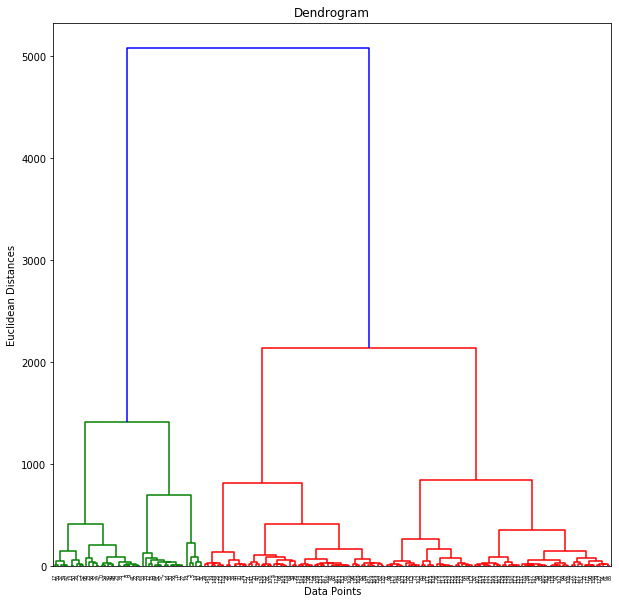

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

In [27]:
x= df_h.drop('label',axis=1)
y= df_h['label']

In [28]:
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy',cv=3,n_jobs=-1)
gsearch.fit(x,y)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
#y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
#y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[37  0  0]
 [ 0 50  0]
 [ 0  0 37]]
Accuracy score of test:  0.9629629629629629
Confusion Matrix of test:  [[10  0  1]
 [ 0 22  0]
 [ 0  1 20]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,13),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='accuracy',n_iter=100,cv=3)
rsearch.fit(x,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
#y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
#y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9919354838709677
Confusion Matrix of train:  [[30  0  0]
 [ 0 52  0]
 [ 1  0 41]]
Accuracy score of test:  0.9814814814814815
Confusion Matrix of test:  [[18  0  0]
 [ 0 20  0]
 [ 1  0 15]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xs=ss.fit_transform(x)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params={'n_neighbors':sp_randint(2,50),'p':sp_randint(1,5)}

rsearch=RandomizedSearchCV(knc,param_distributions=params,cv=3,scoring='accuracy',n_jobs=-1,n_iter=100)

rsearch.fit(xs,y)
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)
knc= KNeighborsClassifier(**rsearch.best_params_)
knc.fit(X_trains,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=knc.predict(X_trains)
#y_train_prob=knc.predict_proba(X_trains)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=knc.predict(X_tests)
#y_test_prob=knc.predict_proba(X_tests)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.782258064516129
Confusion Matrix of train:  [[30  0  0]
 [ 0 44  8]
 [ 7 12 23]]
Accuracy score of test:  0.7222222222222222
Confusion Matrix of test:  [[18  0  0]
 [ 0 16  4]
 [ 6  5  5]]


# PCA

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
X=d.drop(['Target'],axis=1)
y=d['Target']
X_std = StandardScaler().fit_transform(X)

In [34]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 

In [35]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.42

In [36]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [37]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


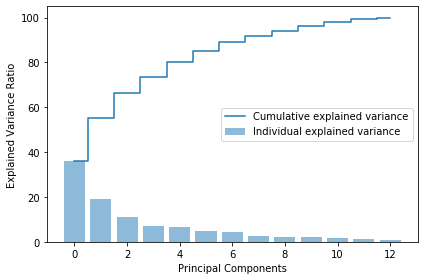

In [38]:
plt.figure(figsize=(6 , 4))
plt.bar(range(13), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(13), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_  
explained_variance

from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)

y_pred_DT_2 = model2.predict(X_test_2)
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Accuracy Score: 0.9166666666666666
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.93      0.88      0.90        16
           3       1.00      1.00      1.00         6

    accuracy                           0.92        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.92      0.92      0.92        36



In [42]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy',cv=3,n_jobs=-1)
gsearch.fit(x,y)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
#y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
#y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9647887323943662
Confusion Matrix of train:  [[44  1  0]
 [ 3 51  1]
 [ 0  0 42]]
Accuracy score of test:  0.9444444444444444
Confusion Matrix of test:  [[14  0  0]
 [ 2 14  0]
 [ 0  0  6]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,13),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='accuracy',n_iter=100,cv=3)
rsearch.fit(x,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
#y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
#y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9838709677419355
Confusion Matrix of train:  [[36  0  0]
 [ 0 50  2]
 [ 0  0 36]]
Accuracy score of test:  0.9814814814814815
Confusion Matrix of test:  [[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xs=ss.fit_transform(x)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params={'n_neighbors':sp_randint(2,50),'p':sp_randint(1,5)}

rsearch=RandomizedSearchCV(knc,param_distributions=params,cv=3,scoring='accuracy',n_jobs=-1,n_iter=100)

rsearch.fit(xs,y)
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)
knc= KNeighborsClassifier(**rsearch.best_params_)
knc.fit(X_trains,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=knc.predict(X_trains)
#y_train_prob=knc.predict_proba(X_trains)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=knc.predict(X_tests)
#y_test_prob=knc.predict_proba(X_tests)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9596774193548387
Confusion Matrix of train:  [[36  0  0]
 [ 3 47  2]
 [ 0  0 36]]
Accuracy score of test:  0.9814814814814815
Confusion Matrix of test:  [[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


# Inference
KMeans Clustering Technique shown the better performance than other Clustering Techniques.

# KMeans Silhoutte

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


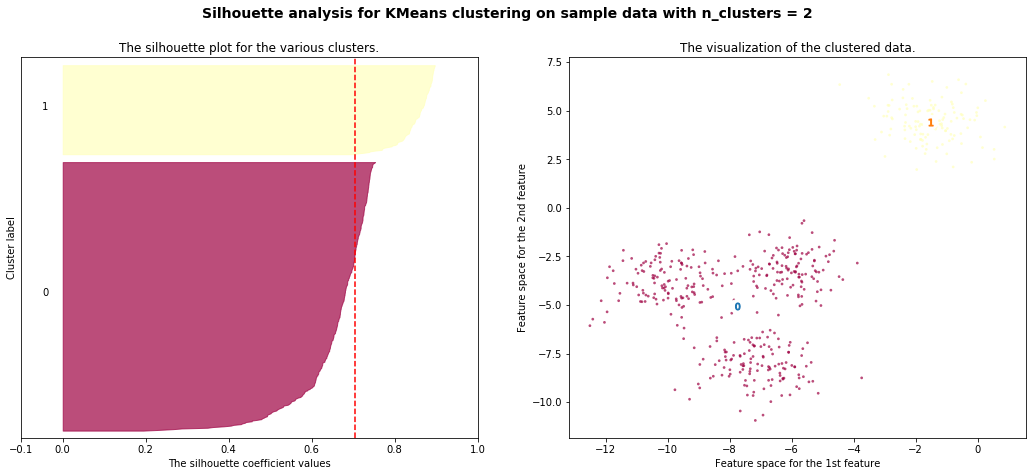

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


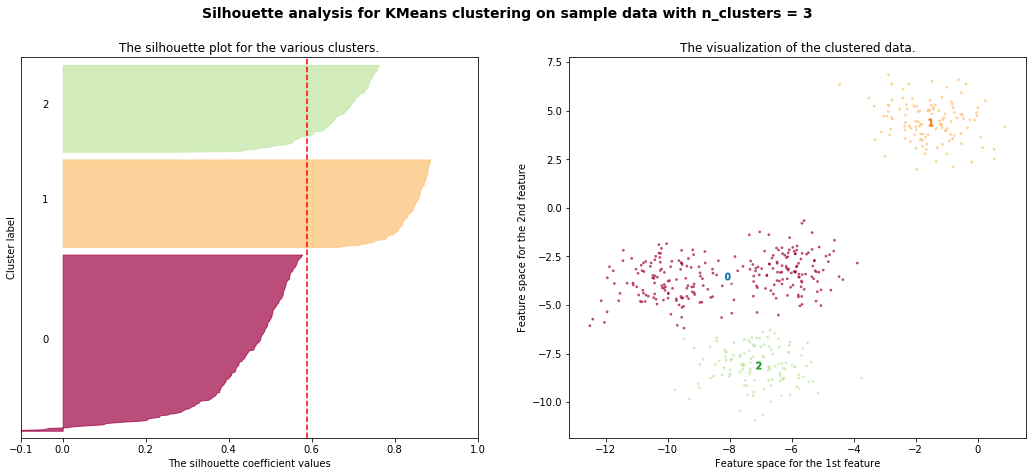

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


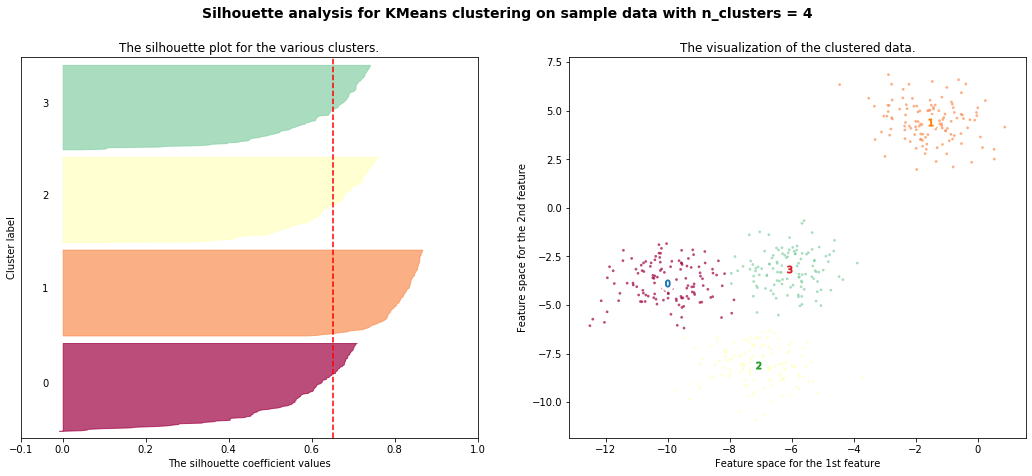

For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


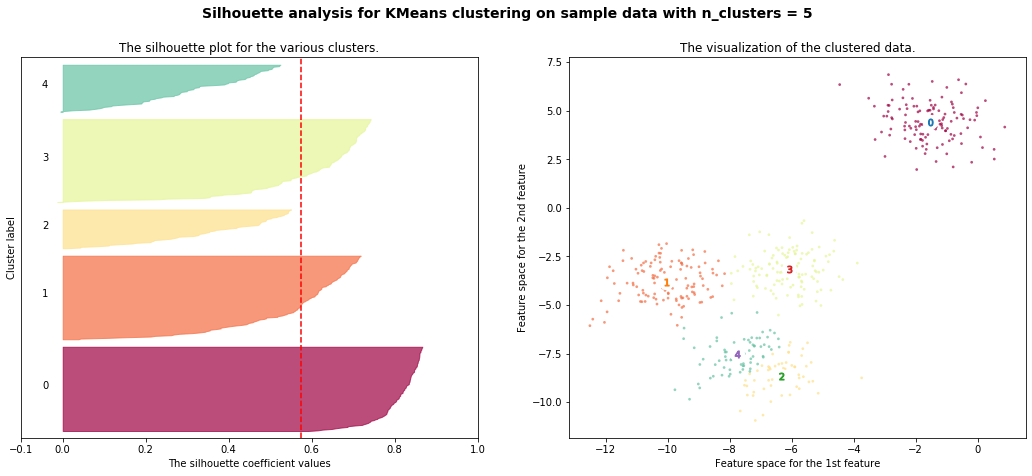

For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


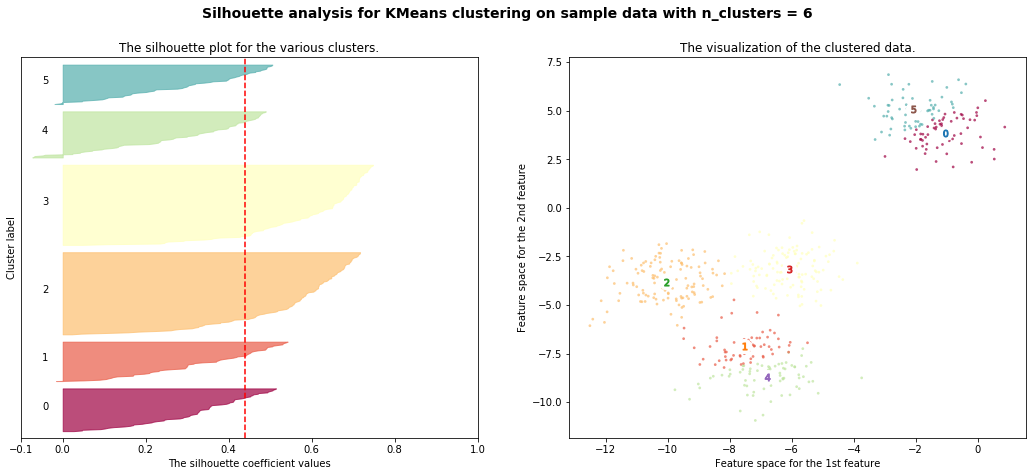

In [46]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()